In [3]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageEnhance

import tensorflow as tf
from tensorflow.keras import datasets

In [4]:
IMAGE_SIZE = 64

In [88]:
def autocontrast(pil_img):
  return ImageOps.autocontrast(pil_img)

def equalize(pil_img):
  return ImageOps.equalize(pil_img)

def posterize(pil_img):
  level = np.random.randint(1, 8)
  return ImageOps.posterize(pil_img, 8 - level)

def rotate(pil_img):
  degrees = np.random.randint(0, 15)
  if np.random.uniform() > 0.5:
    degrees = -degrees
  return pil_img.rotate(degrees, resample=Image.BILINEAR)

def solarize(pil_img):
  level = np.random.randint(0, 255)
  return ImageOps.solarize(pil_img, 256 - level)

def shear_x(pil_img):
  level = np.random.uniform(0.1)
  if np.random.uniform() > 0.5:
    level = -level
  return pil_img.transform((IMAGE_SIZE, IMAGE_SIZE),
                           Image.AFFINE, (1, level, 0, 0, 1, 0),
                           resample=Image.BILINEAR)

def shear_y(pil_img):
  level = np.random.uniform(0.1)
  if np.random.uniform() > 0.5:
    level = -level
  return pil_img.transform((IMAGE_SIZE, IMAGE_SIZE),
                           Image.AFFINE, (1, 0, 0, level, 1, 0),
                           resample=Image.BILINEAR)

def center_shear_x(pil_img):
  level = np.random.uniform(0.1)
  if np.random.uniform() > 0.5:
    level = -level
  return pil_img.transform((IMAGE_SIZE, IMAGE_SIZE),
                           Image.AFFINE, (1, level, -level * IMAGE_SIZE / 2, 0, 1, 0),
                           resample=Image.BILINEAR)

def center_shear_y(pil_img):
  level = np.random.uniform(0.1)
  if np.random.uniform() > 0.5:
    level = -level
  return pil_img.transform((IMAGE_SIZE, IMAGE_SIZE),
                           Image.AFFINE, (1, 0, 0, level, 1, -level * IMAGE_SIZE / 2),
                           resample=Image.BILINEAR)

def translate_x(pil_img):
  level = np.random.randint(0, IMAGE_SIZE // 4)
  if np.random.random() > 0.5:
    level = -level
  return pil_img.transform((IMAGE_SIZE, IMAGE_SIZE),
                           Image.AFFINE, (1, 0, level, 0, 1, 0),
                           resample=Image.BILINEAR)

def translate_y(pil_img):
  level = np.random.randint(0, IMAGE_SIZE // 4)
  if np.random.random() > 0.5:
    level = -level
  return pil_img.transform((IMAGE_SIZE, IMAGE_SIZE),
                           Image.AFFINE, (1, 0, 0, 0, 1, level),
                           resample=Image.BILINEAR)

augmentations = [autocontrast, equalize, posterize, solarize,
                 rotate,
                 # shear_x, shear_y, 
                 center_shear_x, center_shear_y,
                 translate_x, translate_y]

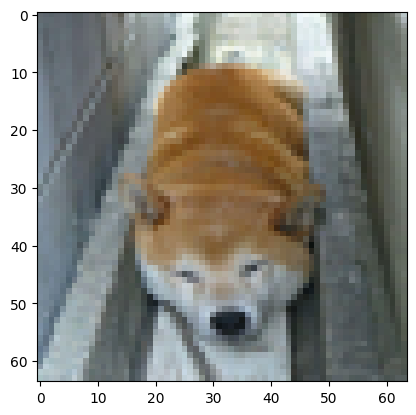

In [27]:
pil_img = Image.open("image3.jpg")
pil_img = pil_img.resize((IMAGE_SIZE, IMAGE_SIZE))
plt.imshow(pil_img)

In [165]:
def choice_random_operation():
    idx = np.random.randint(0, len(augmentations))
    return augmentations[idx]

def augmix(pil_img, chain = 3, max_depth = 3):
    mix_img = np.zeros((IMAGE_SIZE, IMAGE_SIZE, 3))

    # 総和が1になるよう乱数を生成
    weights = np.random.dirichlet([1.0] * 3)

    for W in weights:
        img = copy.deepcopy(pil_img)

        for _ in range(np.random.randint(1, max_depth)):
            op = choice_random_operation()
            img = op(img)
        
        mix_img += W * img

    weight = np.random.uniform(0, 1)
    result_img = weight * np.array(pil_img) + (1 - weight) * np.array(mix_img)
    
    return result_img / 255.0


In [271]:
for _ in range(10000):
    augmix(pil_img)

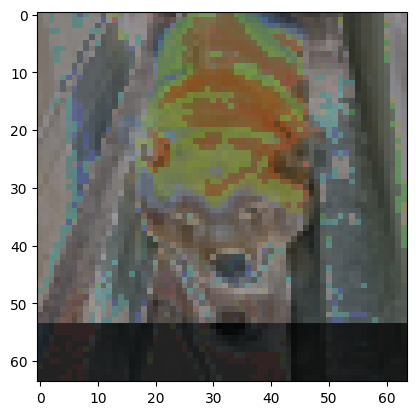

In [287]:
plt.imshow(augmix(pil_img))